## Лабораторная работа №1 | Вариант 4

Выполнил: Дударь Юрий Мохсенович, М8О-309Б-22

### 1. Numpy

In [98]:
!pip install mplcyberpunk

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplcyberpunk

1. Найти индексы не нулевых элементов массива [1,2,0,0,4,0]

In [21]:
?np.nonzero
?enumerate

In [22]:
#без np
arr = [1, 2, 0, 0, 4, 0]
non_zero_indices_ez = [i for i in range(len(arr)) if arr[i] != 0]
print(non_zero_indices_ez)

#без np с enumerate
arr = [1, 2, 0, 0, 4, 0]
non_zero_indices_medium = [i for i, x in enumerate(arr) if x != 0]
print(non_zero_indices_medium)

#с np
arr = np.array([1, 2, 0, 0, 4, 0])
non_zero_indices_boss = np.nonzero(arr)[0]
print(non_zero_indices_boss)

[0, 1, 4]
[0, 1, 4]
[0 1 4]


2. Создайте единичную матрицу размером 3х3

In [23]:
?np.ones

In [24]:
a = np.ones((3,3), dtype = np.int16)
print(a)

[[1 1 1]
 [1 1 1]
 [1 1 1]]


3. Создайте матрицу-шахматную доску 8х8 используя функцию `tile`

In [25]:
?np.tile
?np.flip

In [72]:
row = np.array(['b', 'w'])
chess_board = np.tile(row, (8, 4))
#chess_board[1::2] = np.fliplr(chess_board[1::2])
chess_board[1::2] = np.flip(chess_board[1::2], axis=1)
print(chess_board)

[['b' 'w' 'b' 'w' 'b' 'w' 'b' 'w']
 ['w' 'b' 'w' 'b' 'w' 'b' 'w' 'b']
 ['b' 'w' 'b' 'w' 'b' 'w' 'b' 'w']
 ['w' 'b' 'w' 'b' 'w' 'b' 'w' 'b']
 ['b' 'w' 'b' 'w' 'b' 'w' 'b' 'w']
 ['w' 'b' 'w' 'b' 'w' 'b' 'w' 'b']
 ['b' 'w' 'b' 'w' 'b' 'w' 'b' 'w']
 ['w' 'b' 'w' 'b' 'w' 'b' 'w' 'b']]


4. Дан 1D массив, удалите все элементы которые входят в диапазон `[3, 8]` inplace

In [27]:
#без np
arr_p = [0, 4, 4, 2, 1, 4, 8, 7, 10, 15]
arr_p = [x for x in arr_p if not (3 <= x <= 8)]
print(arr_p)

#с np
arr_n = np.array([0, 4, 4, 2, 1, 4, 8, 7, 10, 15])
arr_mask = arr_n[(arr_n < 3) | (arr_n > 8)]
print(arr_mask)

[0, 2, 1, 10, 15]
[ 0  2  1 10 15]


5. Создайте случайный вектор размером 10 элементов и замените максимальный элемент на 0

In [28]:
arr = np.random.randint(0, 100, 10)
arr[arr == np.max(arr)] = 0
print(arr)

[54 66 58 62 21 85  0 47 21 39]


6. Как распечатать все значения в массиве?

In [29]:
#?*.tolist
?np.set_printoptions

In [30]:
arr = np.random.randint(0, 100, size=10)
print(arr)
print(', '.join(map(str, arr)))
np.set_printoptions(precision=2, suppress=True)
print(arr)
print(arr.tolist())

[92 23 43 79 46 35 75 52 21 19]
92, 23, 43, 79, 46, 35, 75, 52, 21, 19
[92 23 43 79 46 35 75 52 21 19]
[92, 23, 43, 79, 46, 35, 75, 52, 21, 19]


7. Рассмотрим случайный вектор с формой 100х2, представляющей координаты, и найдем расстояния от точки к точке

In [73]:
point_1 = np.random.rand(200).reshape(2, 100)
# print(point_1)
# point_2 = np.random.rand(100)
distance = np.linalg.norm(point_1[0] - point_1[1])
distance

4.094766818873141

8. Как конвертировать массив float(32 bit) к массиву целых чисел (integer 32 bit) in place?

In [74]:
float_array = np.array([1.5, 2.7, 3.9, 4.0], dtype=np.float32)
float_array = float_array.astype(np.int32)
print(float_array)

[1 2 3 4]


9. Как прочитать заданный файл?
```
1, 2, 3, 4, 5
6,  ,  , 7, 8
 ,  , 9,10,11
```

In [75]:
df = pd.read_csv("data.csv", sep=';', header=None)
print(df)

     0    1    2   3   4
0  1.0  2.0  3.0   4   5
1  6.0  NaN  NaN   7   8
2  NaN  NaN  9.0  10  11


10. Какой эквивалент enumerate для numpy массивов?

In [34]:
?np.ndenumerate

In [35]:
arr = np.array([[1, 2], [3, 4]])
for index, value in np.ndenumerate(arr):
    print(index, value)

(0, 0) 1
(0, 1) 2
(1, 0) 3
(1, 1) 4


### 2. Pandas

Найдите ответы на вопросы или выполните действия с предложенным датасетом

Файл: `russian-housing-market.csv`

```
price_doc - Цена продажи
id - Id транзакции
timestamp - Дата транзакции
full_sq - суммарная площадь в квадратных метрах, включая лоджию, валконы и отдельные нежилые помещения
life_sq - жилая площаль в квадратных метрах, исключая лоджии, балконы и прочие нежилые помещения
floor - для апартаментов, этаж помещения
max_floor - количество этажей в здании
material - материал стен
build_year - год постройки
num_room - количество жилых комнат
kitch_sq - площадь кухни
state - состояние апартаментов
product_type - покупка или инвестиция собственника-арендатора
sub_area - название района
```

In [36]:
import pandas as pd
pd.set_option("display.precision", 2)

In [77]:
df = pd.read_csv('/content/russian-housing-market.csv')
filldf = pd.read_csv('/content/russian-housing-market.csv')


In [78]:
df.head(5)


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Bibirevo,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Nagatinskij Zaton,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Tekstil'shhiki,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Mitino,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Basmannoe,16331452


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            30471 non-null  int64  
 1   timestamp     30471 non-null  object 
 2   full_sq       30471 non-null  int64  
 3   life_sq       24088 non-null  float64
 4   floor         30304 non-null  float64
 5   max_floor     20899 non-null  float64
 6   material      20899 non-null  float64
 7   build_year    16866 non-null  float64
 8   num_room      20899 non-null  float64
 9   kitch_sq      20899 non-null  float64
 10  state         16912 non-null  float64
 11  product_type  30471 non-null  object 
 12  sub_area      30471 non-null  object 
 13  price_doc     30471 non-null  int64  
dtypes: float64(8), int64(3), object(3)
memory usage: 3.3+ MB


**Анализ датасета**




In [38]:
df.describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,price_doc
count,30471.00,30471.00,24088.00,30304.00,20899.00,20899.00,1.69e+04,20899.00,20899.00,16912.00,3.05e+04
mean,15237.92,54.21,34.40,7.67,12.56,1.83,3.07e+03,1.91,6.40,2.11,7.12e+06
std,8796.50,38.03,52.29,5.32,6.76,1.48,1.54e+05,0.85,28.27,0.88,4.78e+06
min,1.00,0.00,0.00,0.00,0.00,1.00,0.00e+00,0.00,0.00,1.00,1.00e+05
25%,7620.50,38.00,20.00,3.00,9.00,1.00,1.97e+03,1.00,1.00,1.00,4.74e+06
50%,15238.00,49.00,30.00,6.50,12.00,1.00,1.98e+03,2.00,6.00,2.00,6.27e+06
75%,22855.50,63.00,43.00,11.00,17.00,2.00,2.00e+03,2.00,9.00,3.00,8.30e+06
max,30473.00,5326.00,7478.00,77.00,117.00,6.00,2.01e+07,19.00,2014.00,33.00,1.11e+08


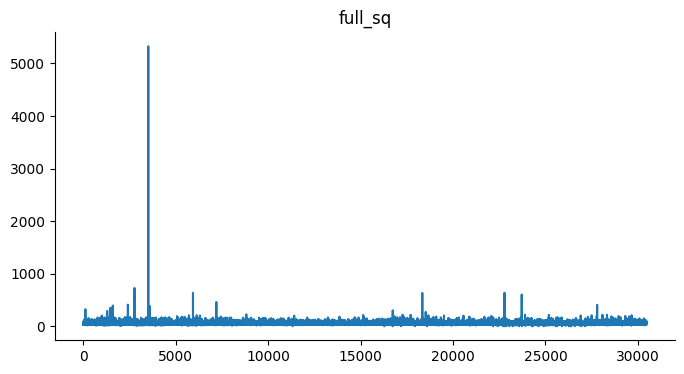

In [39]:
# @title full_sq

df['full_sq'].plot(kind='line', figsize=(8, 4), title='full_sq')
plt.gca().spines[['top', 'right']].set_visible(False)

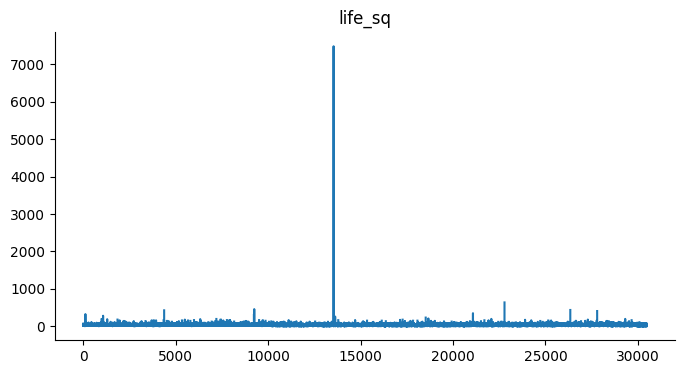

In [40]:
# @title life_sq

df['life_sq'].plot(kind='line', figsize=(8, 4), title='life_sq')
plt.gca().spines[['top', 'right']].set_visible(False)

In [41]:
filtered_df = df[(df['full_sq'] < 1000) &
                 (df['full_sq'] >= df['life_sq'])]
percent_array = (filtered_df['life_sq'] / filtered_df['full_sq']) * 100
print("Максимальная площадь:", df['full_sq'].max(),
      "\nМинимальная площадь:", df['full_sq'].min(),
      "\nМаксимальная жилая площадь:", df['life_sq'].max(),
      "\nМинимальная жилая площадь:", df['life_sq'].min(),
      "\nСредняя площадь:", df['full_sq'].mean(),
      "\nСредняя жилая площадь:", df['life_sq'].mean(),
      "\nРазница средних значений:", df['full_sq'].mean()-df['life_sq'].mean(),
      "\nСреднее разницы значений:", (df['full_sq'] - df['life_sq']).mean(),
      "\nСреднее разницы значений без выбросов:", (df[df['full_sq'] < 1000]['full_sq'] - df[df['life_sq'] < 1000]['life_sq']).mean(),
      "\nСредний процент значения столбца life_sq от full_sq:", percent_array.mean(),
      )

Максимальная площадь: 5326 
Минимальная площадь: 0 
Максимальная жилая площадь: 7478.0 
Минимальная жилая площадь: 0.0 
Средняя площадь: 54.21426930524105 
Средняя жилая площадь: 34.403271338425775 
Разница средних значений: 19.810997966815272 
Среднее разницы значений: 18.63334440385254 
Среднее разницы значений без выбросов: 18.721871626671096 
Средний процент значения столбца life_sq от full_sq: 63.37425886662323


In [42]:
df.sort_values(by="life_sq", ascending=False).head(3)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,price_doc
13546,13549,2013-12-30,79,7478.0,8.0,17.0,1.0,2014.0,3.0,1.0,1.0,OwnerOccupier,Poselenie Voskresenskoe,7705000
9646,9649,2013-08-06,82,802.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,OwnerOccupier,Chertanovo Juzhnoe,12031350
22785,22788,2014-09-23,637,637.0,18.0,19.0,4.0,2016.0,2.0,10.0,1.0,OwnerOccupier,Tverskoe,4725142


In [43]:
df.sort_values(by="full_sq", ascending=False).head(3)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,price_doc
3527,3530,2012-09-07,5326,22.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,OwnerOccupier,Birjulevo Vostochnoe,6868818
2780,2783,2012-07-06,729,44.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Troparevo-Nikulino,13250000
22785,22788,2014-09-23,637,637.0,18.0,19.0,4.0,2016.0,2.0,10.0,1.0,OwnerOccupier,Tverskoe,4725142


1. Посчитайте количество записей в датасете с отсутствующей информацией о жилой площади жилого помещения

In [45]:
?pd.notna

In [46]:
missing_life_sq = df['life_sq'].isna().sum()
print(df.shape)
print(missing_life_sq)

(30471, 14)
6383


2. Предложите способ заменить отсутствующие значения из пункта 1 и реализуйте его. Способ нужно аргументировать(сказать почему это достаточно хорошее приближение)

Количество пропусков значений столбца life_sq достаточно существенно, так как если бы мы обучали на этих данных предсказательную модель, то способ обработки nun играл бы очень важную роль.

Мои варианты обработки пропущенных значений:


 - Удалить пропущенные значения
---
Как видно из расчета процента пропущенных данных, пропусков около 21%, насколько критично удалять такое количество данных - зависит от метода обучения модлели.

In [47]:
# @title Процент пропусков

print(missing_life_sq * 100 / df.shape[0])

20.947786419874635


- Заполнить данные относительно имеющейся полной площади помещения
---
Значения столбца full_sq полностью заполнены. Изходя из вида данных, можно предположить, что полная площадь помещения всегда не меньше жилой площади. Следующим шагом необходимо проверить валидность данных. как видно из примера ниже, есть 37 позиций, нарушающих наше правило, их очень малое количество, поэтому можно их исключить из выборки, либо как-то еще обработать. Я их исключю. Помимо этого, есть еще выброс(график и выжимка из таблице выше). Такой выброс мы тоже не будем учитывать и откинем.

После валидации данных, можно заполнить пропущенные данные следующим образом: Считаем, какой средний процент составляет жилая площадь от общей и протягеваем его на пропуски.

In [48]:
count = (df['full_sq'] < df['life_sq']).sum()
print(count)

37


In [49]:
df[df['full_sq'] < df['life_sq']].head(5)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,price_doc
1084,1085,2012-02-06,44,281.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Bibirevo,6200000
1188,1189,2012-02-14,9,44.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Veshnjaki,6300000
1822,1825,2012-04-09,18,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Ljublino,5200000
1863,1866,2012-04-11,30,178.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Presnenskoe,5900000
2009,2012,2012-04-25,5,40.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Gol'janovo,5770000


In [50]:
#заполняем пропуски
filldf['life_sq'].fillna(filldf['full_sq'] * (percent_array.mean() / 100), inplace=True)

In [51]:
#проверка
print(filldf['life_sq'].isna().sum())

0


In [286]:
#Пересчет
filldf['full_sq'].mean(), filldf['life_sq'].mean(), filldf['life_sq'].max(), filldf['life_sq'].min(), filldf['full_sq'].mean() - filldf['life_sq'].mean()
filtered_df = filldf[(filldf['full_sq'] < 1000) &
                     (filldf['full_sq'] >= filldf['life_sq'])]
percent_array = (filtered_df['life_sq'] / filtered_df['full_sq']) * 100
print("Максимальная площадь:", filldf['full_sq'].max(),
      "\nМинимальная площадь:", filldf['full_sq'].min(),
      "\nМаксимальная жилая площадь:", filldf['life_sq'].max(),
      "\nМинимальная жилая площадь:", filldf['life_sq'].min(),
      "\nСредняя площадь:", filldf['full_sq'].mean(),
      "\nСредняя жилая площадь:", filldf['life_sq'].mean(),
      "\nРазница средних значений:", filldf['full_sq'].mean()-filldf['life_sq'].mean(),
      "\nСреднее разницы значений:", (filldf['full_sq'] - filldf['life_sq']).mean(),
      "\nСреднее разницы значений без выбросов:", (filldf[filldf['full_sq'] < 1000]['full_sq'] - filldf[filldf['life_sq'] < 1000]['life_sq']).mean(),
      "\nСредний процент значения столбца life_sq от full_sq:", percent_array.mean(),
      )
print(percent_array)

Максимальная площадь: 5326 
Минимальная площадь: 0 
Максимальная жилая площадь: 7478.0 
Минимальная жилая площадь: 0.0 
Средняя площадь: 54.21426930524105 
Средняя жилая площадь: 34.403271338425775 
Разница средних значений: 19.810997966815272 
Среднее разницы значений: 18.63334440385254 
Среднее разницы значений без выбросов: 18.721871626671096 
Средний процент значения столбца life_sq от full_sq: 63.37425886662323
0         62.79
1         55.88
2         67.44
3         56.18
4        100.00
          ...  
30464     91.07
30466     61.36
30467     68.60
30469     50.00
30470     65.12
Length: 24050, dtype: float64


-

3. Какие значения имеет 25, 50 и 75 перцентили полной площади помещения

In [53]:
desc_stats = df['full_sq'].describe()
print("25-й перцентиль:", desc_stats['25%'])
print("50-й перцентиль:", desc_stats['50%'])
print("75-й перцентиль:", desc_stats['75%'])

25-й перцентиль: 38.0
50-й перцентиль: 49.0
75-й перцентиль: 63.0


4. Посчитайте среднюю стоимость продажи помещений с общей площадью от 50 до 70 квадратных метров

In [287]:
print(df[(df['full_sq'] >= 50) &
         (df['full_sq'] <= 70)]['price_doc'].mean())

7243041.190994609


5. Какая максимальная этажность здания представлена в датасете

In [55]:
# ахахахахах, это как
print(df['floor'].max())
print(df['max_floor'].max())
df[df['max_floor'] == 117].head()

77.0
117.0


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,price_doc
25940,25943,2014-12-06,63,63.0,8.0,117.0,1.0,NaN,2.0,1.0,1.0,OwnerOccupier,Tverskoe,7239838


6. Выявите район с самым дорогим жильем

In [56]:
average_price_by_area = df.groupby('sub_area')['price_doc'].mean()
average_price_by_area_sorted = average_price_by_area.sort_values(ascending=False)
print(average_price_by_area_sorted.head(5))
most_expensive_area = average_price_by_area.idxmax()
max_average_price = average_price_by_area.max()
print(f"Район с самым дорогим жильем: {most_expensive_area}")
print(f"Средняя цена продажи в этом районе: {max_average_price}")

sub_area
Hamovniki         2.01e+07
Zamoskvorech'e    1.62e+07
Arbat             1.58e+07
Presnenskoe       1.40e+07
Obruchevskoe      1.39e+07
Name: price_doc, dtype: float64
Район с самым дорогим жильем: Hamovniki
Средняя цена продажи в этом районе: 20116565.544444446


7. Посчитайте среднюю стоимость за квадратный метр жилья в Митино(Mitino)

In [57]:
print(df[df['sub_area'] == 'Mitino']['full_sq'].isna().sum())
mitino_df = df[df['sub_area'] == 'Mitino'].copy()
mitino_df['price_per_sq_meter'] = mitino_df['price_doc'] / mitino_df['full_sq']
average_price_per_sq_meter = mitino_df['price_per_sq_meter'].mean()
print(f"Средняя стоимость за квадратный метр в районе Митино: {average_price_per_sq_meter:.2f}")

0
Средняя стоимость за квадратный метр в районе Митино: 171841.40


8. Посчитайте среднюю площадь комнаты в Бибирево

In [288]:
bibirevo_df = df[(df['sub_area'] == 'Bibirevo') &
                 (df['num_room'].notna())].copy()
average_room_area = (bibirevo_df['full_sq'] / bibirevo_df['num_room']).mean()
print(f"Средняя площадь комнаты в районе Бибирево: {average_room_area:.2f} квадратных метров")

Средняя площадь комнаты в районе Бибирево: 28.13 квадратных метров


9. Проанализируйте есть ли разница в цене между квартирами на 1 и 9 этажах

In [82]:
filtered_df = df[df['floor'].isin([1, 9])]
min_prices = filtered_df.groupby('floor')['price_doc'].min()
average_prices = filtered_df.groupby('floor')['price_doc'].mean()
max_prices = filtered_df.groupby('floor')['price_doc'].max()
print(min_prices, average_prices, max_prices)

floor
1.0    260000
9.0    190000
Name: price_doc, dtype: int64 floor
1.0    5.74e+06
9.0    6.94e+06
Name: price_doc, dtype: float64 floor
1.0    30000000
9.0    56500000
Name: price_doc, dtype: int64


10. Найдите минимальную стоимость квартиры с жилой площадью не менее 60 квадратных метров, не менее чем 3мя комнатами и не ниже чем на 5 этаже

In [289]:
print(df[(df['life_sq'] >= 60)
          & (df['num_room'] >= 3)
          & (df['floor'] >= 5)]['price_doc'].min())

1000000


### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

1. Как менялась средняя цена квартиры в Нагатинском Затоне(Nagatinski Zaton) с течением времени

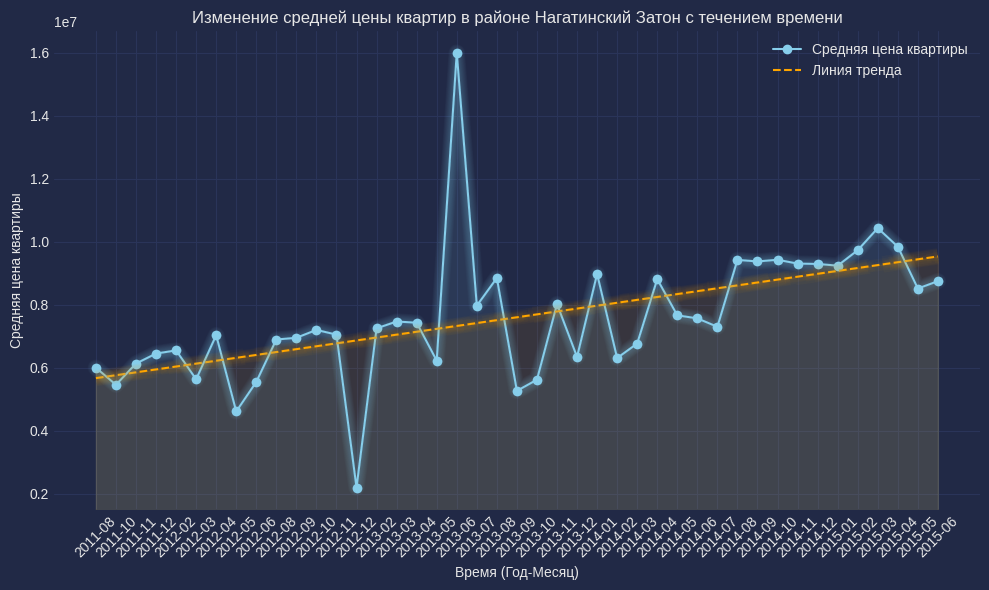

In [250]:
nagatinski_data = df[df['sub_area'] == 'Nagatinskij Zaton'].copy()
nagatinski_data = nagatinski_data.dropna(subset=['price_doc', 'timestamp'])
nagatinski_data['timestamp'] = pd.to_datetime(nagatinski_data['timestamp'])
nagatinski_data['year_month'] = nagatinski_data['timestamp'].dt.to_period('M')
average_price = nagatinski_data.groupby('year_month')['price_doc'].mean()

x = np.arange(len(average_price))
y = average_price.values
coefficients = np.polyfit(x, y, 1)
trendline = np.poly1d(coefficients)

plt.style.use("cyberpunk")
plt.figure(figsize=(10, 6))
plt.plot(average_price.index.astype(str), average_price, marker='o', linestyle='-', color='skyblue', label='Средняя цена квартиры')
plt.plot(average_price.index.astype(str), trendline(x), linestyle='--', color='orange', label='Линия тренда')
plt.title('Изменение средней цены квартир в районе Нагатинский Затон с течением времени')
plt.xlabel('Время (Год-Месяц)')
plt.ylabel('Средняя цена квартиры')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
mplcyberpunk.add_glow_effects()
plt.show()


2. Постройте гистограмму распределения цен на квартиры с общей площадью более 50 кв.метров

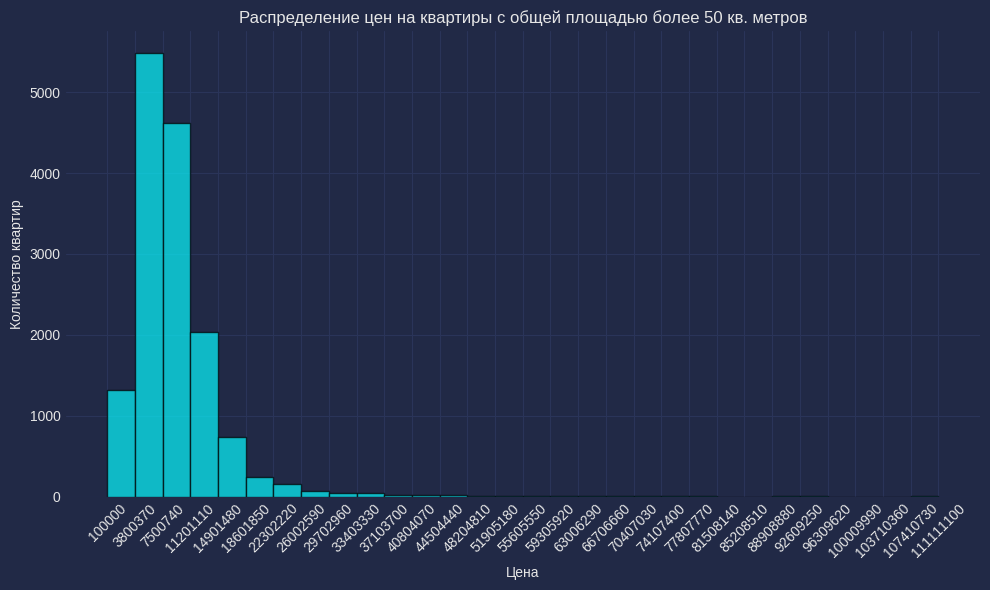

In [258]:
large_sq_df = df[(df['full_sq'] > 50)]
plt.figure(figsize=(10, 6))
plt.hist(large_sq_df['price_doc'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Распределение цен на квартиры с общей площадью более 50 кв. метров')
plt.xlabel('Цена')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.ticklabel_format(style='plain', axis='x')
min_price = large_sq_df['price_doc'].min()
max_price = large_sq_df['price_doc'].max()
step = (max_price - min_price) // 30
plt.xticks(ticks=np.arange(min_price, max_price, step), rotation=45)
plt.tight_layout()
plt.show()




3. Визуализируйте количество проданных квартир в разных районах

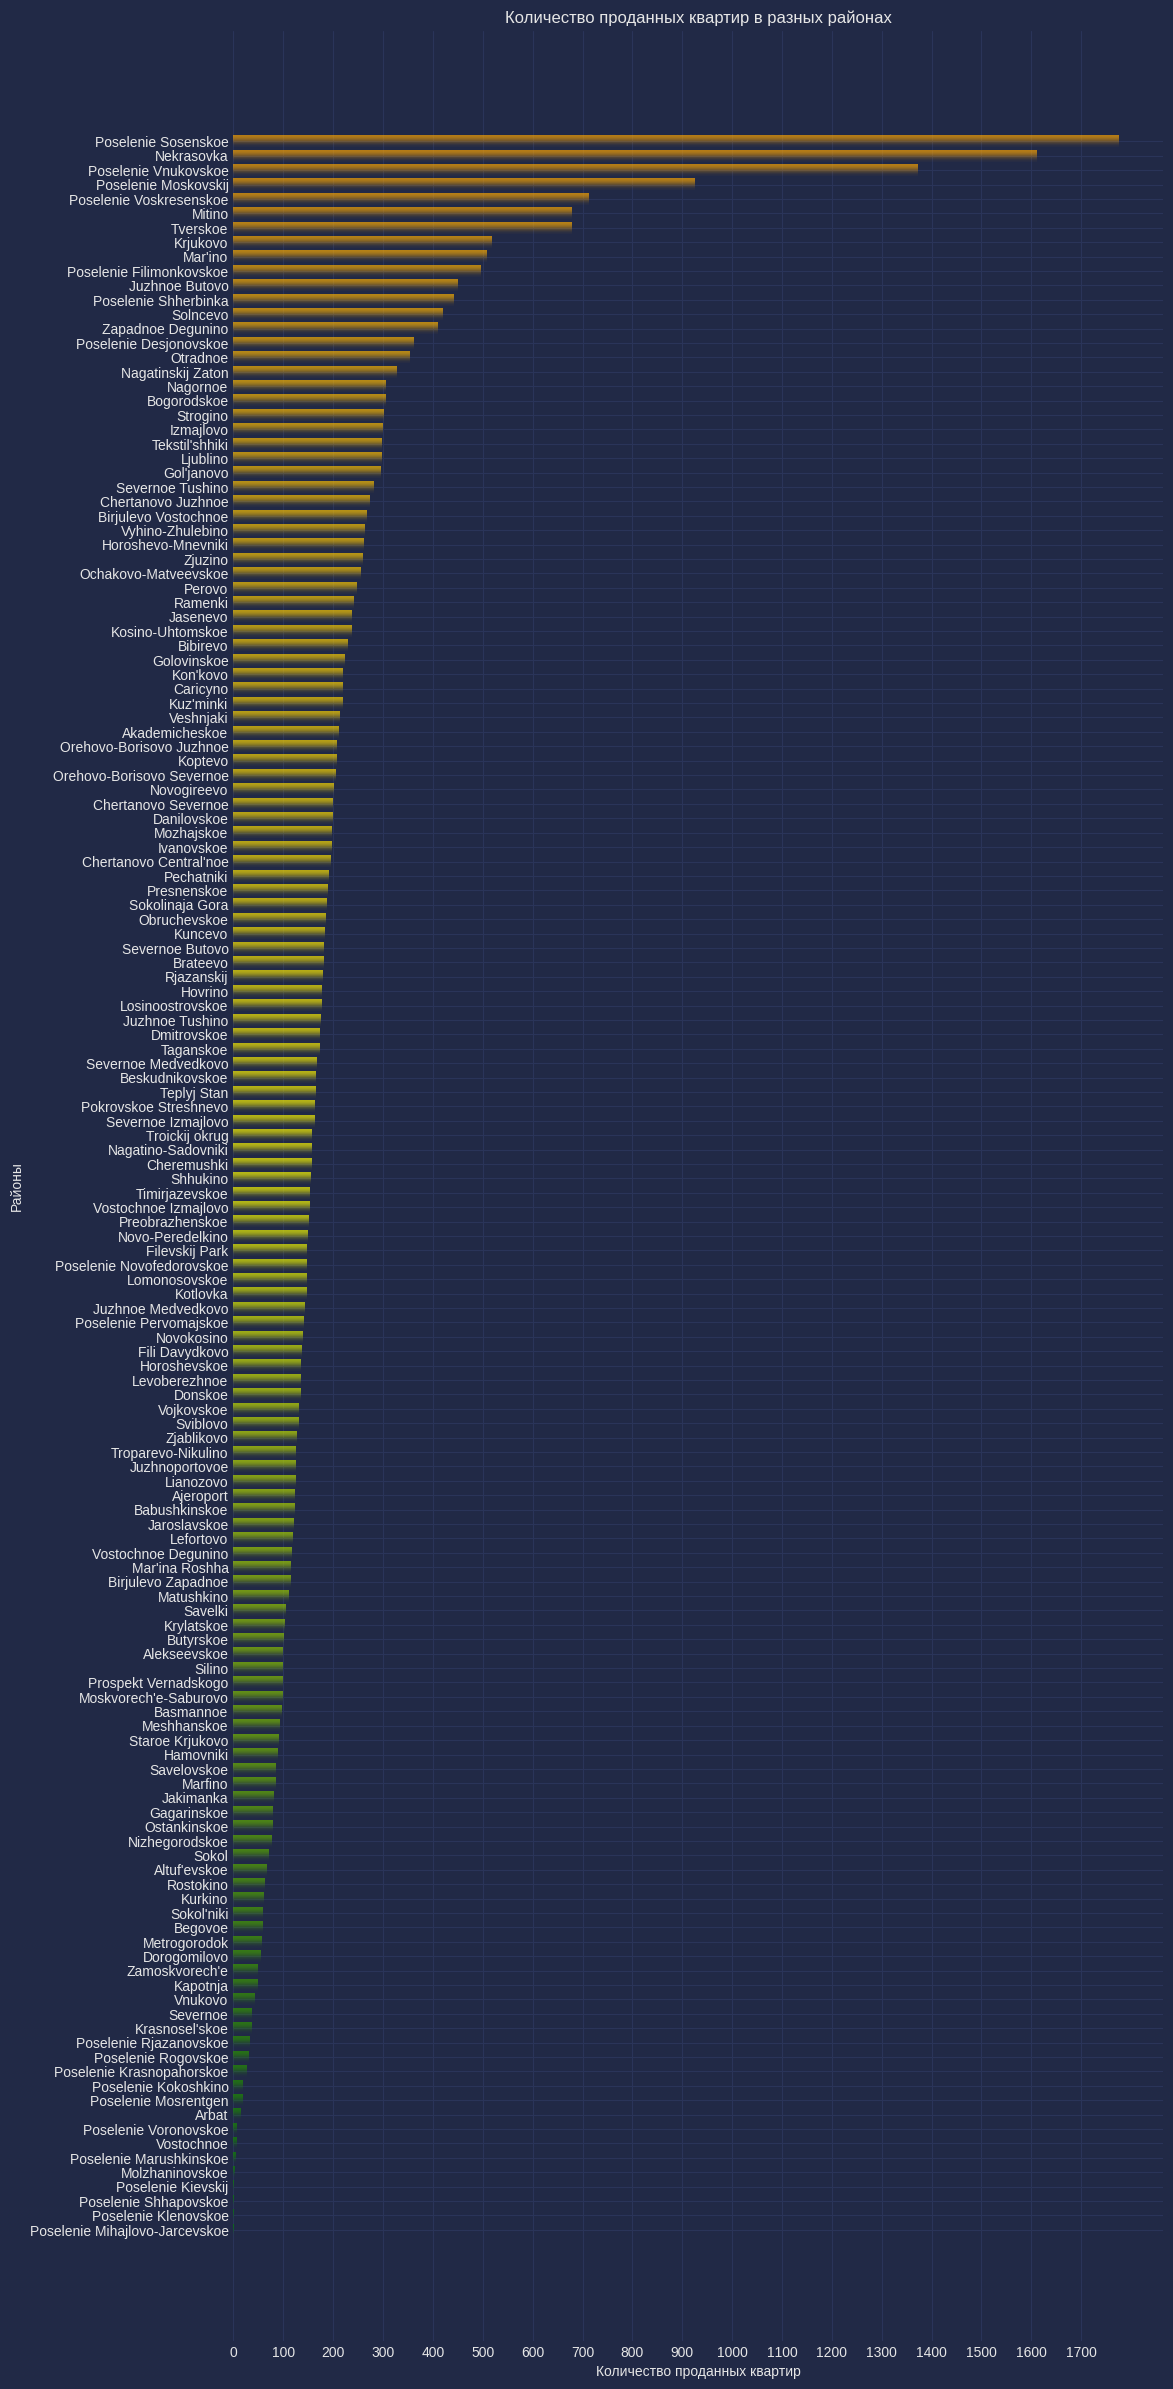

In [259]:
sales_by_area = df['sub_area'].value_counts().sort_values(ascending=True)

from matplotlib.colors import LinearSegmentedColormap
colors = ['green', 'yellow', 'orange']
n_colors = len(sales_by_area)
custom_palette = sns.color_palette(LinearSegmentedColormap.from_list('custom_cmap', colors)(np.linspace(0, 1, n_colors)))

plt.figure(figsize=(12,30))
bars = plt.barh(sales_by_area.index, sales_by_area.values, color=custom_palette, alpha=0.7)
plt.title('Количество проданных квартир в разных районах')
plt.xlabel('Количество проданных квартир')
plt.ylabel('Районы')
plt.grid(True)
plt.xticks(np.arange(0, sales_by_area.max() + 1, step=100))
mplcyberpunk.add_bar_gradient(bars=bars)
plt.show()

4. Постройте box plot отображающий распределение полных площадей квартир в Басманном районе

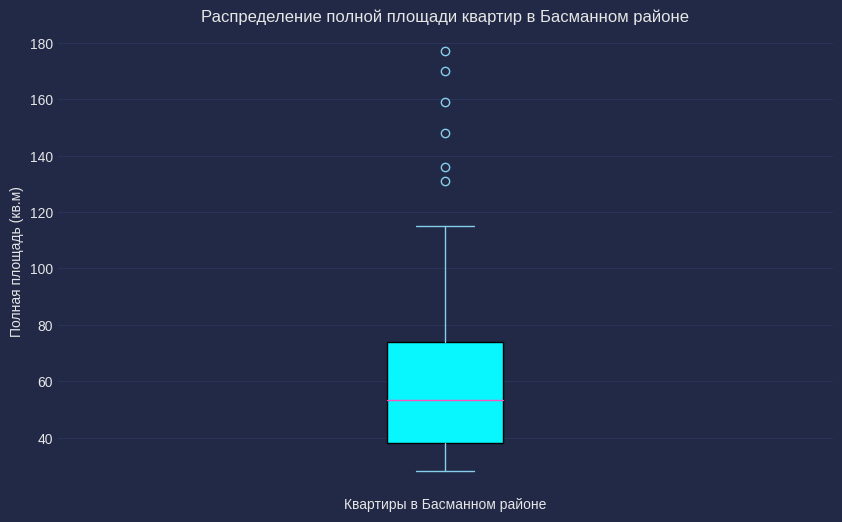

In [194]:
basmannyy_data = df[df['sub_area'] == 'Basmannoe']
plt.figure(figsize=(10, 6))
box = plt.boxplot(basmannyy_data['full_sq'].dropna(), patch_artist=True)

colors = 'skyblue'
plt.setp(box['whiskers'], color=colors)
plt.setp(box['caps'], color=colors)
plt.setp(box['fliers'], markeredgecolor=colors)

plt.title('Распределение полной площади квартир в Басманном районе')
plt.xlabel('Квартиры в Басманном районе')
plt.ylabel('Полная площадь (кв.м)')
plt.xticks([])
plt.grid(True)
plt.show()

5. Визуализируйте зависимость средней стоимости квартир в зависимости от этажа

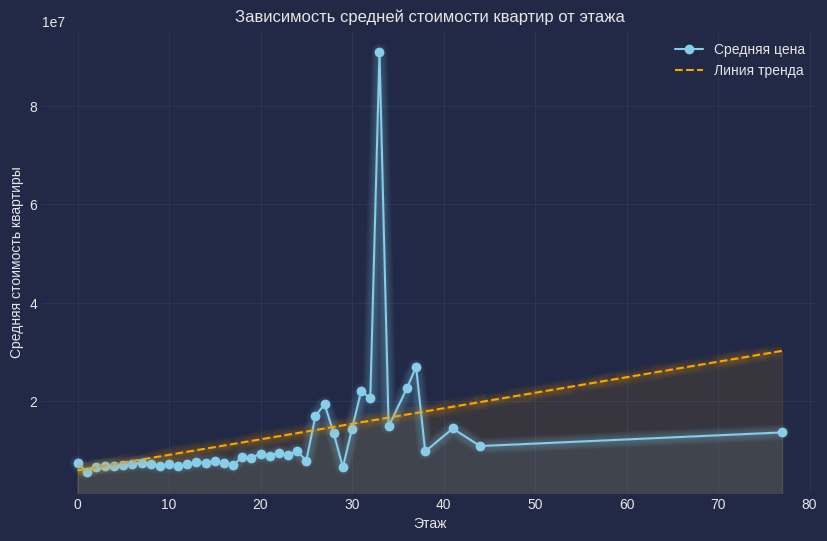

In [221]:
filtered_data = df[['price_doc', 'floor']].dropna()
avg_price_by_floor = filtered_data.groupby('floor')['price_doc'].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_price_by_floor.index, avg_price_by_floor.values, marker='o', linestyle='-', color='skyblue', label='Средняя цена')

coefficients = np.polyfit(avg_price_by_floor.index, avg_price_by_floor.values, deg=1)
trendline = np.poly1d(coefficients)
plt.plot(avg_price_by_floor.index, trendline(avg_price_by_floor.index), linestyle='--', color='orange', label='Линия тренда')

plt.title('Зависимость средней стоимости квартир от этажа')
plt.xlabel('Этаж')
plt.ylabel('Средняя стоимость квартиры')
plt.legend()
plt.grid(True)
mplcyberpunk.add_glow_effects()
plt.show()



6. Покажите как меняется средняя площадь квартир в зависимости от района

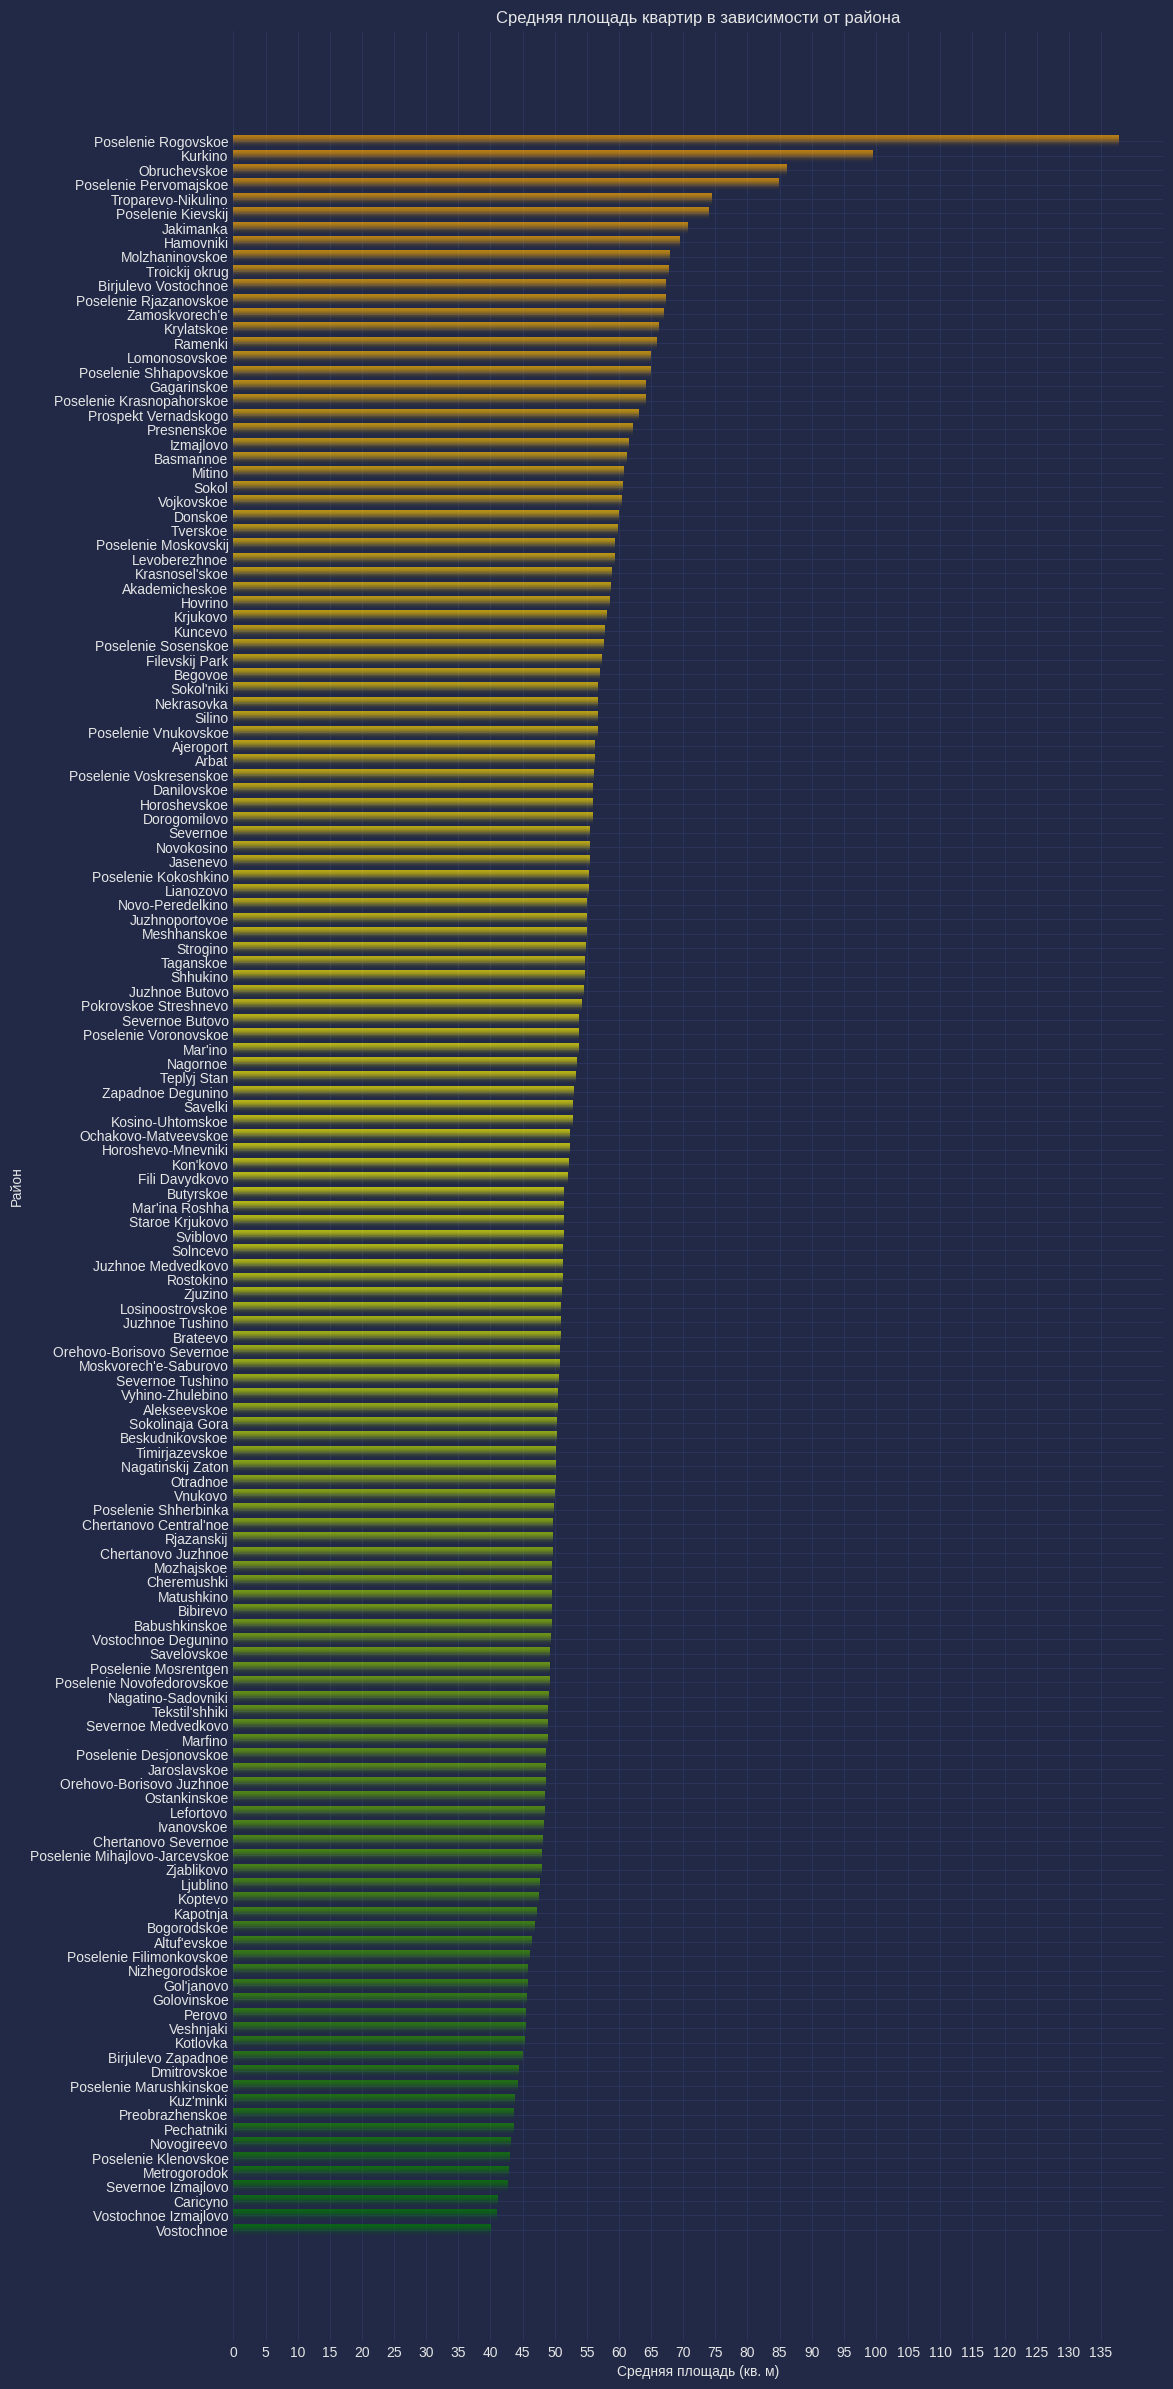

In [257]:
avg_sq_per_area = df.groupby('sub_area')['full_sq'].mean().reset_index()
avg_sq_per_area = avg_sq_per_area.sort_values(by='full_sq', ascending=True)

colors = ['green', 'yellow', 'orange']
n_colors = len(avg_sq_per_area)
custom_palette = sns.color_palette(LinearSegmentedColormap.from_list('custom_cmap', colors)(np.linspace(0, 1, n_colors)))

plt.figure(figsize=(12, 30))
bars = plt.barh(avg_sq_per_area['sub_area'], avg_sq_per_area['full_sq'], color=custom_palette, alpha=0.7)

plt.title('Средняя площадь квартир в зависимости от района')
plt.xlabel('Средняя площадь (кв. м)')
plt.ylabel('Районы')
plt.grid(True)
plt.xticks(np.arange(0, avg_sq_per_area['full_sq'].max() + 1, step=5))
mplcyberpunk.add_bar_gradient(bars=bars)
plt.show()

7. Постройте график изменения медианной цены на квартиру менее 50 кв. метров за период с 2011 до 2014 года*

\* Задание на доп. балл

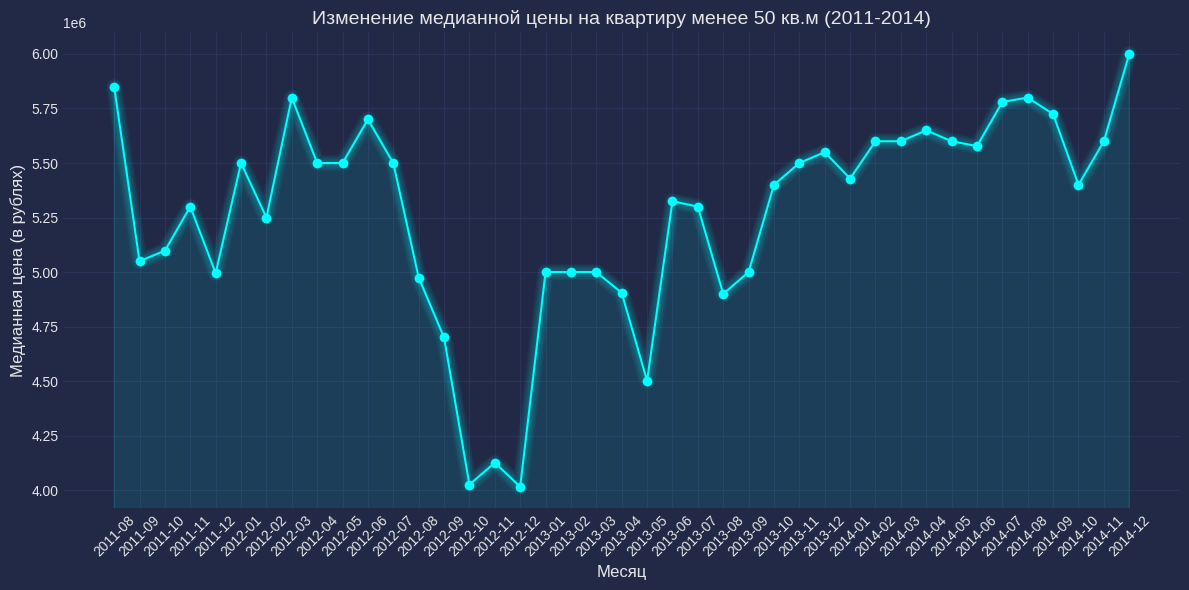

In [285]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
filtered_df = df[(df['full_sq'] < 50) &
                 (df['timestamp'].dt.year >= 2011) &
                 (df['timestamp'].dt.year <= 2014)].copy()

filtered_df['year_month'] = filtered_df['timestamp'].dt.to_period('M')
median_price_by_month = filtered_df.groupby('year_month')['price_doc'].median()

plt.figure(figsize=(12, 6))
plt.plot(median_price_by_month.index.astype(str), median_price_by_month.values, marker='o', linestyle='-', color='cyan')
plt.title('Изменение медианной цены на квартиру менее 50 кв.м (2011-2014)', fontsize=14)
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Медианная цена (в рублях)', fontsize=12)

plt.xticks(rotation=45)
mplcyberpunk.add_glow_effects()
plt.grid(True)
plt.tight_layout()
plt.show()

